✅ Data loaded: (501, 8)
  Ticker            Full Name                  Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                     Sub-Industry    Market Cap  Total Assets  \
0        Industrial Conglomerates   81300594688  3.986800e+10   
1               Building Products    9768433664  3.240000e+09   
2           Health Care Equipment  223718588416  8.141400e+10   
3                   Biotechnology  405548793856  1.351610e+11   
4  IT Consulting & Other Services  147834912768  5.593236e+10   

   Total Liabilities  Tobin's Q  
0       3.597400e+10   2.941572  
1       1.356500e+09   3.433622  
2       3.351300e+10   3.159550  
3       1.317970e+11   3.975598  
4       2.676412e+10   3.121610  


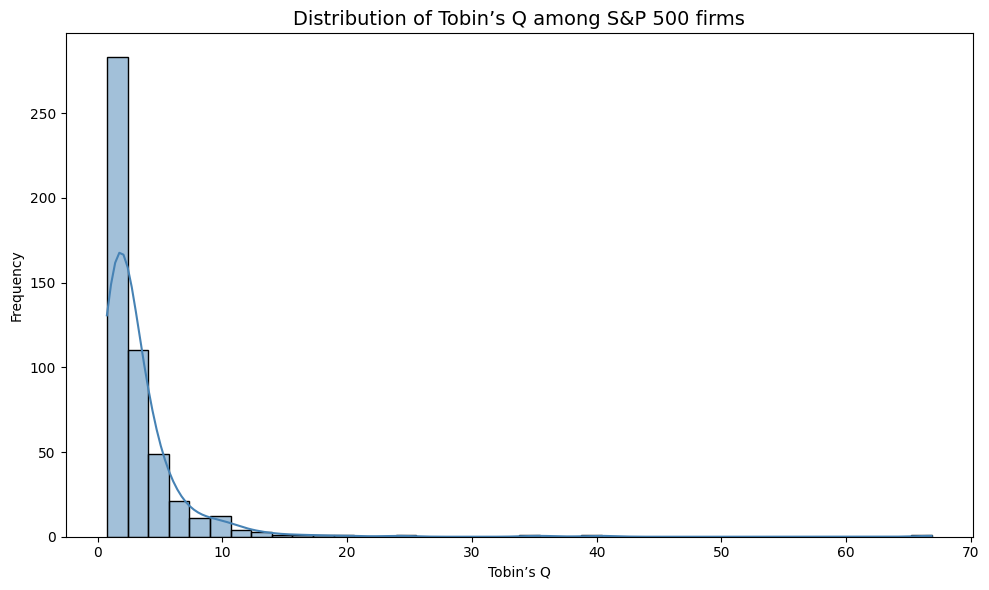

/tmp/ipykernel_22016/2229113025.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


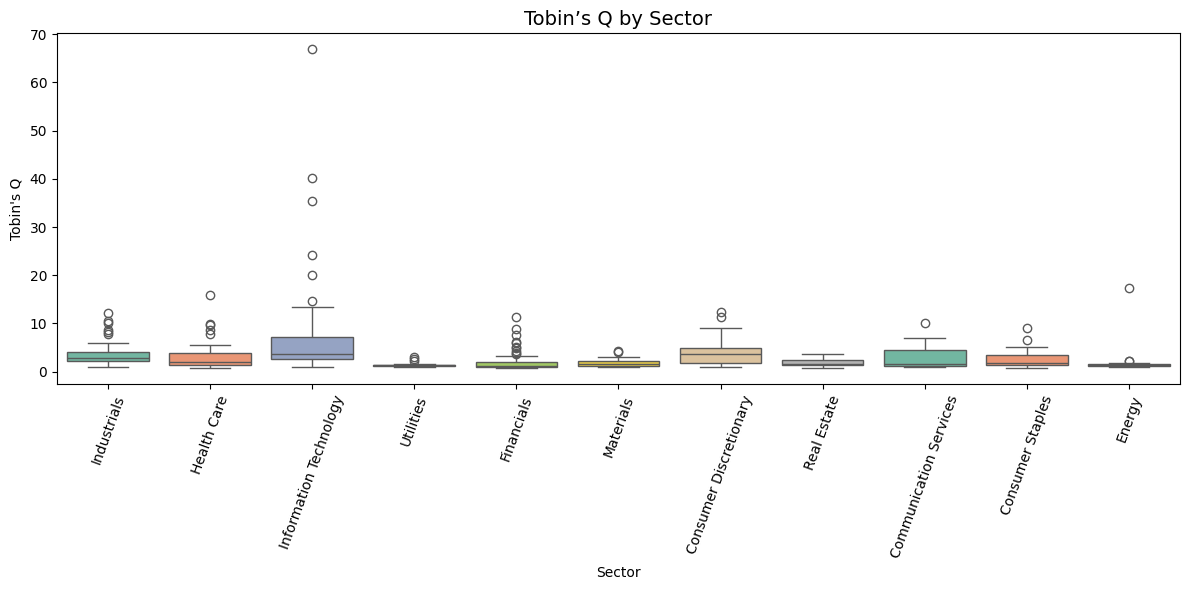

/tmp/ipykernel_22016/2229113025.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


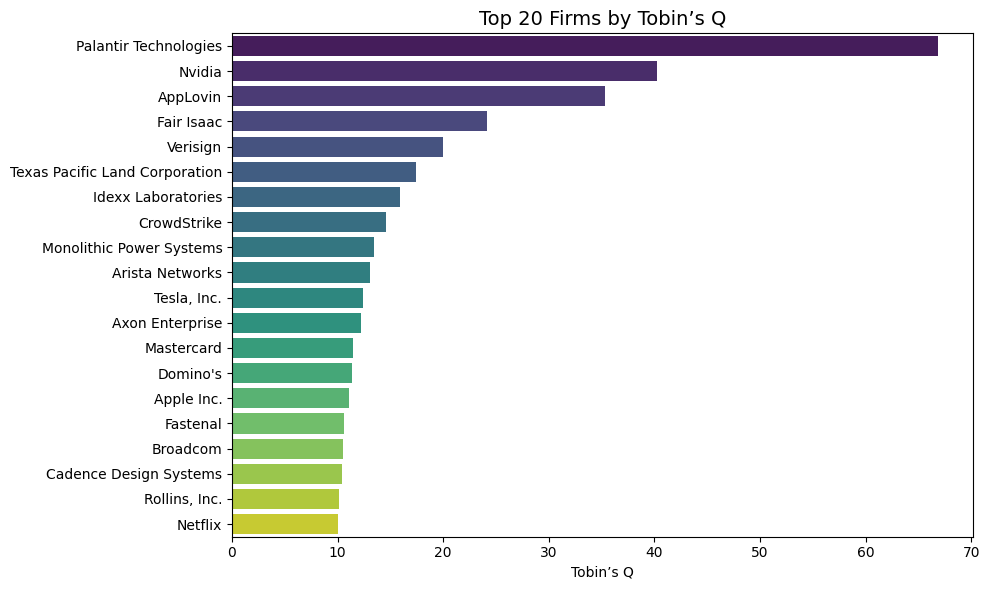

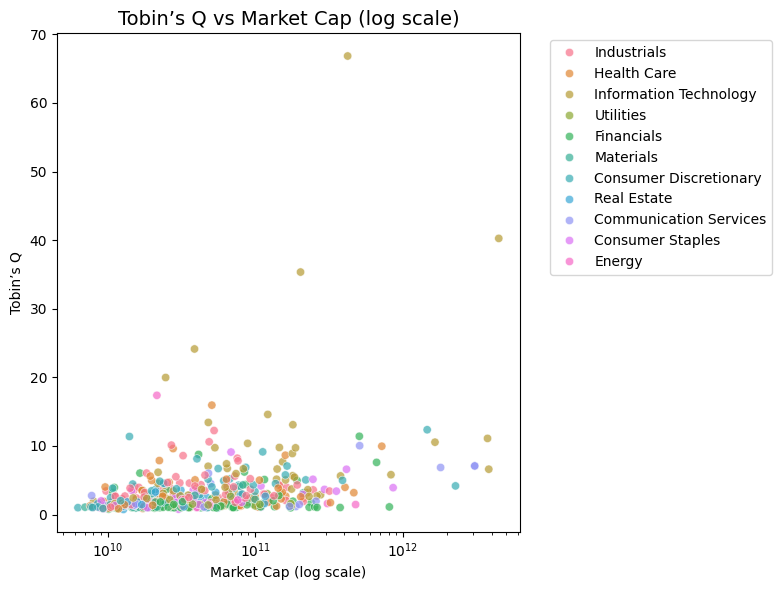

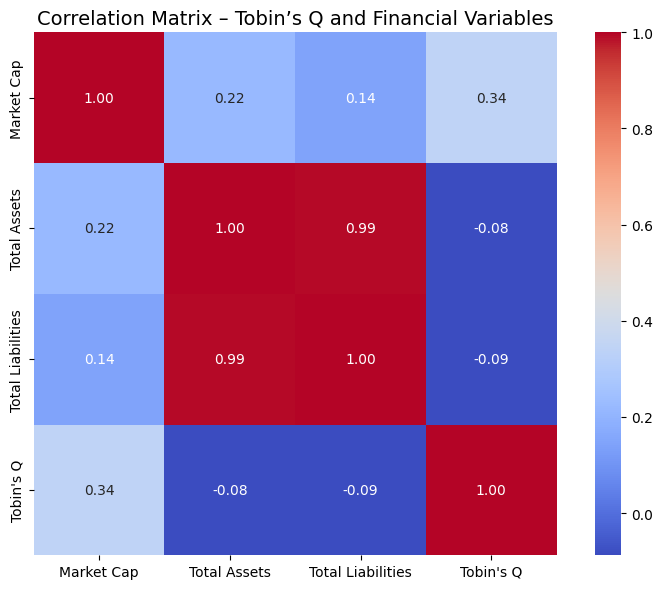

/tmp/ipykernel_22016/2229113025.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_q.values, y=sector_q.index, palette="crest")


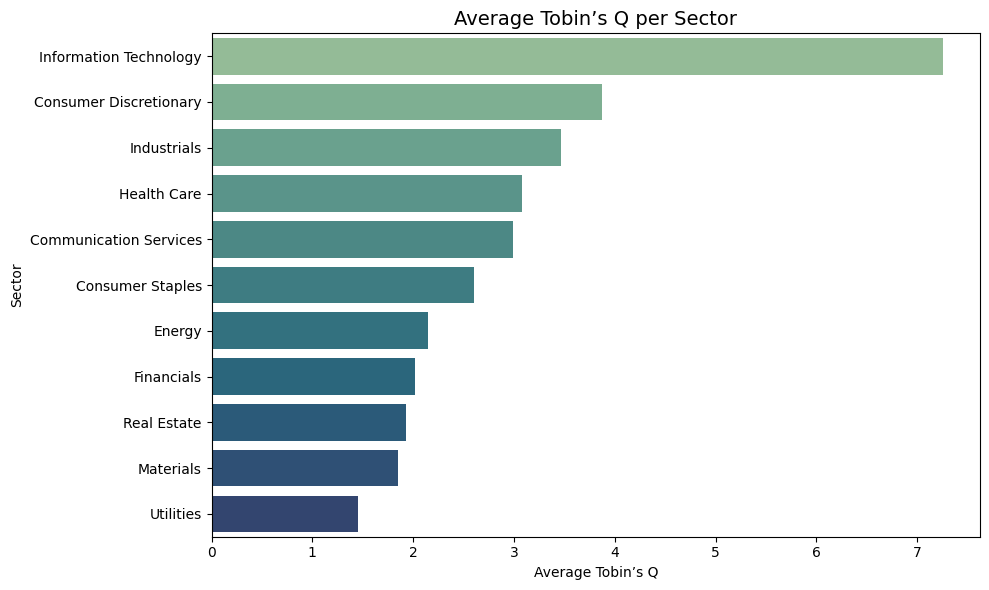

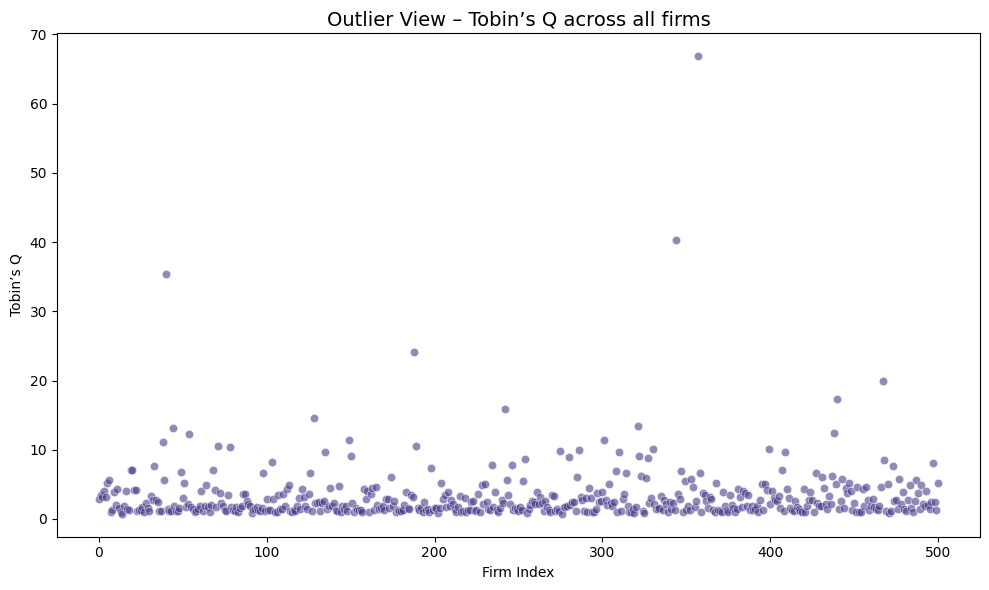

In [2]:
# tobins_q_visualizations.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
file_path = "sp500_tobins_q.csv"   # your attached file
df = pd.read_csv(file_path)

# Clean up columns (just in case)
df.columns = [c.strip() for c in df.columns]
df = df.dropna(subset=["Tobin's Q"])

# --- Basic overview ---
print("✅ Data loaded:", df.shape)
print(df.head())

# --- 1️⃣ Distribution of Tobin’s Q ---
plt.figure(figsize=(10, 6))
sns.histplot(df["Tobin's Q"], bins=40, kde=True, color="steelblue")
plt.title("Distribution of Tobin’s Q among S&P 500 firms", fontsize=14)
plt.xlabel("Tobin’s Q")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --- 2️⃣ Boxplot by Sector ---
if "Sector" in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df, x="Sector", y="Tobin's Q", palette="Set2"
    )
    plt.xticks(rotation=70)
    plt.title("Tobin’s Q by Sector", fontsize=14)
    plt.tight_layout()
    plt.show()

# --- 3️⃣ Top 20 Firms by Tobin’s Q ---
top20 = df.nlargest(20, "Tobin's Q")
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top20, x="Tobin's Q", y="Full Name", palette="viridis"
)
plt.title("Top 20 Firms by Tobin’s Q", fontsize=14)
plt.xlabel("Tobin’s Q")
plt.ylabel("")
plt.tight_layout()
plt.show()

# --- 4️⃣ Tobin’s Q vs Market Cap ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, x="Market Cap", y="Tobin's Q", hue="Sector", alpha=0.7
)
plt.xscale("log")
plt.title("Tobin’s Q vs Market Cap (log scale)", fontsize=14)
plt.xlabel("Market Cap (log scale)")
plt.ylabel("Tobin’s Q")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# --- 5️⃣ Correlation heatmap ---
numeric_cols = df.select_dtypes("number")
corr = numeric_cols.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix – Tobin’s Q and Financial Variables", fontsize=14)
plt.tight_layout()
plt.show()

# --- 6️⃣ Average Tobin’s Q by Sector ---
if "Sector" in df.columns:
    sector_q = df.groupby("Sector")["Tobin's Q"].mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sector_q.values, y=sector_q.index, palette="crest")
    plt.title("Average Tobin’s Q per Sector", fontsize=14)
    plt.xlabel("Average Tobin’s Q")
    plt.ylabel("Sector")
    plt.tight_layout()
    plt.show()

# --- 7️⃣ Outlier detection scatter ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=range(len(df)), y="Tobin's Q", color="darkslateblue", alpha=0.6)
plt.title("Outlier View – Tobin’s Q across all firms", fontsize=14)
plt.ylabel("Tobin’s Q")
plt.xlabel("Firm Index")
plt.tight_layout()
plt.show()
